In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymutspec.annotation import transcriptor
from scipy.spatial.distance import cityblock

from utils import nuc_spectrum_to_matrix, get_equilibrium_probabilities

In [31]:
spectra = pd.read_csv('data/viral_spectra_dataset.csv', index_col=16)

# calculate asymmetry of complementary mutation types

def calc_asymmetry(row):
    asymmetries = []
    for a, b in [('A>G', 'T>C'), ('A>C', 'T>G'), ('A>T', 'T>A'),
                 ('C>T', 'G>A'), ('C>G', 'G>C'), ('C>A', 'G>T')]:
        val_a = row.get(a, 0)
        val_b = row.get(b, 0)
        if val_a == 0 or val_b == 0:
            asymmetries.append(0)
        else:
            asymmetries.append(max(val_a/val_b, val_b/val_a))
        #     asymmetries.append((val_a - val_b) / (val_a + val_b))
    return np.mean(np.abs(asymmetries))
spectra['asymmetry'] = spectra.apply(calc_asymmetry, axis=1)

spectra.sort_values('asymmetry', ascending=False)

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,asymmetry
virusname,,,,,,,,,,,,,,,,,
CoV20A,0.007791,0.044050,0.014029,0.019518,0.007484,0.409514,0.101614,0.016632,0.324148,0.008769,0.040320,0.006130,+,SARS-CoV-2 20A,Bloom_etal,-,4.470610
CoV22C,0.005280,0.061198,0.014484,0.029170,0.003536,0.474034,0.127443,0.013234,0.198024,0.011246,0.055648,0.006704,+,SARS-CoV-2 22C,Bloom_etal,-,2.984744
PEDV,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,2.323833
OROV,0.004384,0.131054,0.008711,0.030561,0.037705,0.254494,0.281585,0.014140,0.061028,0.022270,0.134087,0.019982,-,Oropouche orthobunyavirus,nemu,118655,2.317844
rsv-a,0.007703,0.070279,0.038923,0.053017,0.002418,0.290197,0.334728,0.000332,0.040141,0.033842,0.120245,0.008174,-,RSV-A,Bloom_etal,-,2.281043
alCoV1,0.021283,0.089537,0.048924,0.063711,0.002963,0.309491,0.185698,0.015537,0.128513,0.023943,0.092693,0.017707,+,Alphacoronavirus 1,nemu,693997,2.201406
HEV,0.017080,0.192882,0.040216,0.012920,0.006531,0.271882,0.110460,0.018793,0.029552,0.024070,0.265895,0.009718,+,Orthohepevirus A,nemu,1678143,2.072227
FMDV,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,2.019422
WNV,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,2.001368


0.21077647 0.28922353 0.28922353 0.21077647

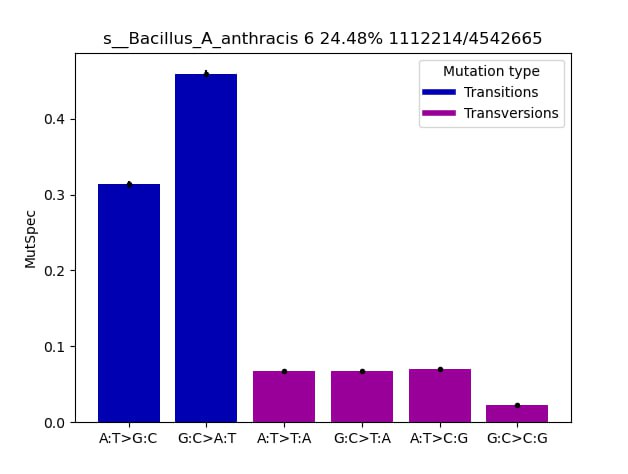

In [ ]:
random_spectrum6 = {
    'C>A': 0.07,
    'C>G': 0.03,
    'C>T': 0.46,
    'T>A': 0.07,
    'T>C': 0.3,
    'T>G': 0.07
}  # towards the AT rich equilibrium
sum(random_spectrum6.values())

1.0

In [7]:
random_spectrum12 = {}
for k, v in random_spectrum6.items():
    rev_k = k.translate(transcriptor)
    random_spectrum12[k] = v / 2
    random_spectrum12[rev_k] = v / 2
random_spectrum12

{'C>A': 0.035,
 'G>T': 0.035,
 'C>G': 0.015,
 'G>C': 0.015,
 'C>T': 0.23,
 'G>A': 0.23,
 'T>A': 0.035,
 'A>T': 0.035,
 'T>C': 0.15,
 'A>G': 0.15,
 'T>G': 0.035,
 'A>C': 0.035}

In [8]:
M = nuc_spectrum_to_matrix(random_spectrum12)
M

array([[0.   , 0.035, 0.15 , 0.035],
       [0.035, 0.   , 0.015, 0.23 ],
       [0.23 , 0.015, 0.   , 0.035],
       [0.035, 0.15 , 0.035, 0.   ]])

In [11]:
nuc_eq = get_equilibrium_probabilities(M)
print('ACGT')
nuc_eq

ACGT


array([0.29444444, 0.20555556, 0.20555556, 0.29444444])

## Viruses check

Let's Check equilibrium for SARS-CoV-2 spectrum (https://academic.oup.com/mbe/article/40/4/msad085/7113660)

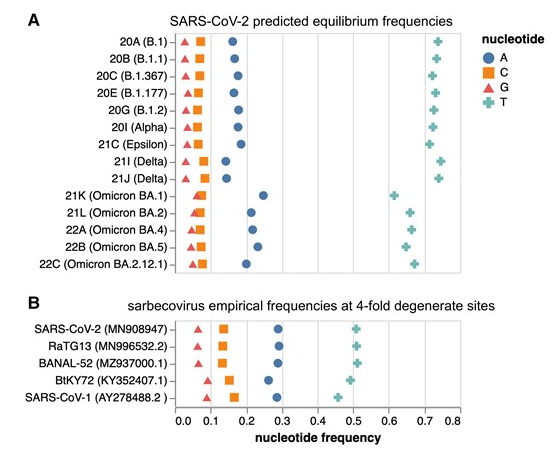

In [13]:
cov_spectrum = spectra.loc['CoV20A'].head(12).to_dict()
Mcov = nuc_spectrum_to_matrix(cov_spectrum)
nuc_eq_cov = get_equilibrium_probabilities(Mcov)
print('ACGT')
nuc_eq_cov

ACGT


array([0.16219871, 0.07212197, 0.02759827, 0.73808105])

### 12 --> 6 --> 12 on aymmetric spectrum

#### Cov20A (highly asymmetric)

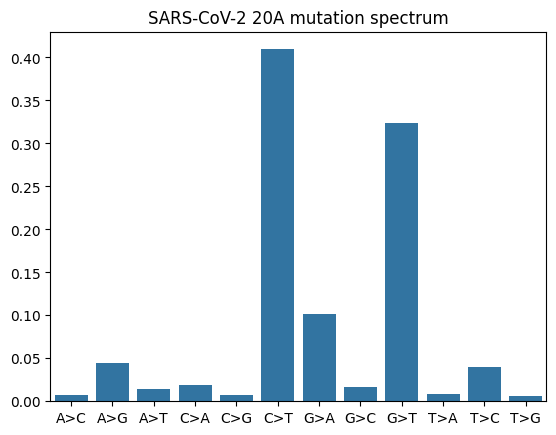

In [18]:
sns.barplot(cov_spectrum)
plt.title('SARS-CoV-2 20A mutation spectrum');

In [20]:
cov_spectrum

{'A>C': 0.0077911372098969,
 'A>G': 0.0440498441691127,
 'A>T': 0.0140291228140653,
 'C>A': 0.0195175404071852,
 'C>G': 0.0074844155540994,
 'C>T': 0.4095141257537074,
 'G>A': 0.1016144416498693,
 'G>C': 0.0166321853619397,
 'G>T': 0.3241477888082968,
 'T>A': 0.0087687106995913,
 'T>C': 0.04032032598269,
 'T>G': 0.0061303615895456}

In [50]:
cov_spectrum6 = {}
for k, v in cov_spectrum.items():
    rev_k = k.translate(transcriptor)
    if k in cov_spectrum6 or rev_k in cov_spectrum6:
        continue
    cov_spectrum6[k] = v + cov_spectrum.get(rev_k, 0)
cov_spectrum6

{'A>C': 0.0139214987994425,
 'A>G': 0.0843701701518027,
 'A>T': 0.0227978335136566,
 'C>A': 0.343665329215482,
 'C>G': 0.0241166009160391,
 'C>T': 0.5111285674035767}

In [51]:
cov_spectrum6_12 = {}
for k, v in cov_spectrum6.items():
    rev_k = k.translate(transcriptor)
    cov_spectrum6_12[k] = v / 2
    cov_spectrum6_12[rev_k] = v / 2
cov_spectrum6_12

{'A>C': 0.00696074939972125,
 'T>G': 0.00696074939972125,
 'A>G': 0.04218508507590135,
 'T>C': 0.04218508507590135,
 'A>T': 0.0113989167568283,
 'T>A': 0.0113989167568283,
 'C>A': 0.171832664607741,
 'G>T': 0.171832664607741,
 'C>G': 0.01205830045801955,
 'G>C': 0.01205830045801955,
 'C>T': 0.25556428370178835,
 'G>A': 0.25556428370178835}

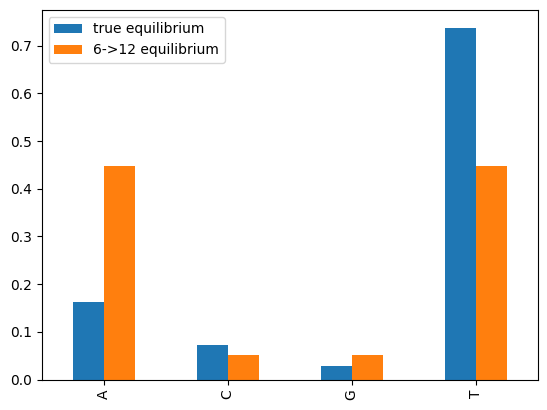

In [52]:
Mcov12 = nuc_spectrum_to_matrix(cov_spectrum)
nuc_eq_cov12 = get_equilibrium_probabilities(Mcov12)

Mcov6 = nuc_spectrum_to_matrix(cov_spectrum6_12)
nuc_eq_cov6 = get_equilibrium_probabilities(Mcov6)

a = pd.Series(nuc_eq_cov12, index=['A', 'C', 'G', 'T'], name='true equilibrium')
b = pd.Series(nuc_eq_cov6, index=['A', 'C', 'G', 'T'], name='6->12 equilibrium')
df_eq = pd.concat([a, b], axis=1)
df_eq.plot.bar();

In [54]:
cityblock(nuc_eq_cov12, nuc_eq_cov6)

np.float64(0.6204060336538533)

#### aka spectrum (more symmetric)

<Axes: >

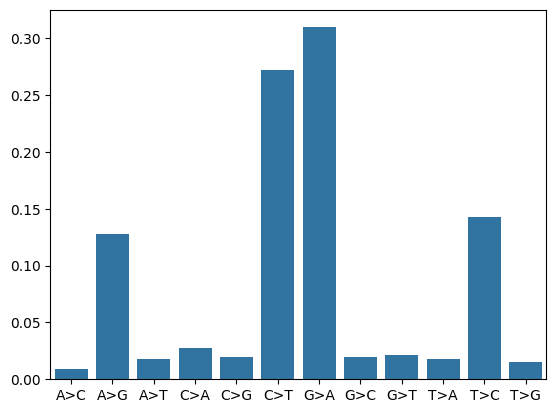

In [56]:
sym_spectrum = spectra.loc['aka'].head(12).to_dict()
sns.barplot(sym_spectrum)

In [60]:
sym_spectrum['T>C'] / sym_spectrum['A>G'], sym_spectrum['G>A'] / sym_spectrum['C>T']

(1.1122813866333543, 1.139311004432673)

In [61]:
sym_spectrum6 = {}
sym_spectrum6_12 = {}
for k, v in sym_spectrum.items():
    rev_k = k.translate(transcriptor)
    if k in sym_spectrum6 or rev_k in sym_spectrum6:
        continue
    sym_spectrum6[k] = v + sym_spectrum.get(rev_k, 0)

for k, v in sym_spectrum6.items():
    rev_k = k.translate(transcriptor)
    sym_spectrum6_12[k] = v / 2
    sym_spectrum6_12[rev_k] = v / 2
sym_spectrum6_12

{'A>C': 0.011910945,
 'T>G': 0.011910945,
 'A>G': 0.13527050000000002,
 'T>C': 0.13527050000000002,
 'A>T': 0.0179711,
 'T>A': 0.0179711,
 'C>A': 0.02465445,
 'G>T': 0.02465445,
 'C>G': 0.01941265,
 'G>C': 0.01941265,
 'C>T': 0.2907805,
 'G>A': 0.2907805}

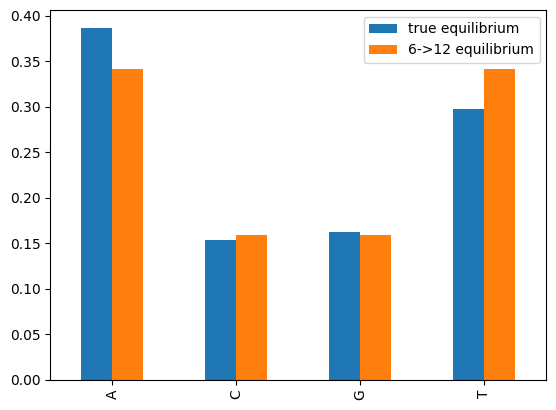

In [62]:
Msym12 = nuc_spectrum_to_matrix(sym_spectrum)
nuc_eq_sym12 = get_equilibrium_probabilities(Msym12)

Msym6 = nuc_spectrum_to_matrix(sym_spectrum6_12)
nuc_eq_sym6 = get_equilibrium_probabilities(Msym6)

a = pd.Series(nuc_eq_sym12, index=['A', 'C', 'G', 'T'], name='true equilibrium')
b = pd.Series(nuc_eq_sym6, index=['A', 'C', 'G', 'T'], name='6->12 equilibrium')
df_eq = pd.concat([a, b], axis=1)
df_eq.plot.bar();

In [63]:
cityblock(nuc_eq_sym12, nuc_eq_sym6)

np.float64(0.09866493461181186)

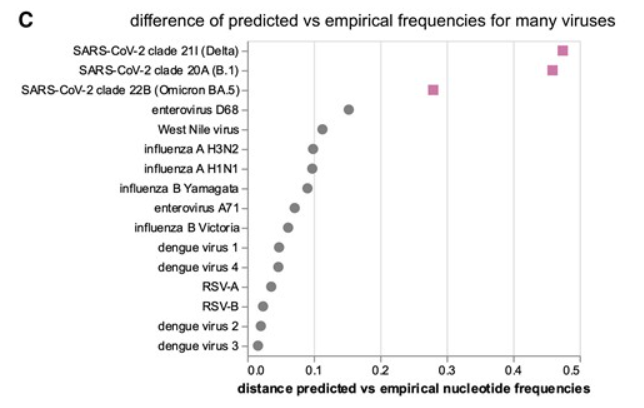